# Visualization of the Iris Data Set
The [iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) shows up often in the teaching of statistics and data science. In this notebook we explore the data to try to get a feel for how well the measured data characterizes the different species, and in particular whether we can expect it to be linearly separable.

In [1]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
from   mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from   sklearn import decomposition
from   sklearn import datasets
from   sklearn.decomposition import KernelPCA
from   sklearn.decomposition import PCA
from   sklearn.manifold import TSNE
from   sklearn.preprocessing import StandardScaler

plt_style = 'ggplot'  # seaborn-talk is better, if available

The data set comes with Scikit-Learn. We load it and normalize it.

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
y_labels = ['Iris setosa', 'Iris virginica', 'Iris versicolor']
X_std = StandardScaler().fit_transform(X)

## Eigenvalue analysis
We start by doing a principal components analysis (PCA). The eigenvalues of the covariance matrix give us a sense of how important each component is.

In [3]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort()
eig_pairs.reverse()
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.93035377559
0.927403621517
0.148342226482
0.0207460139956


<IPython.core.display.Javascript object>


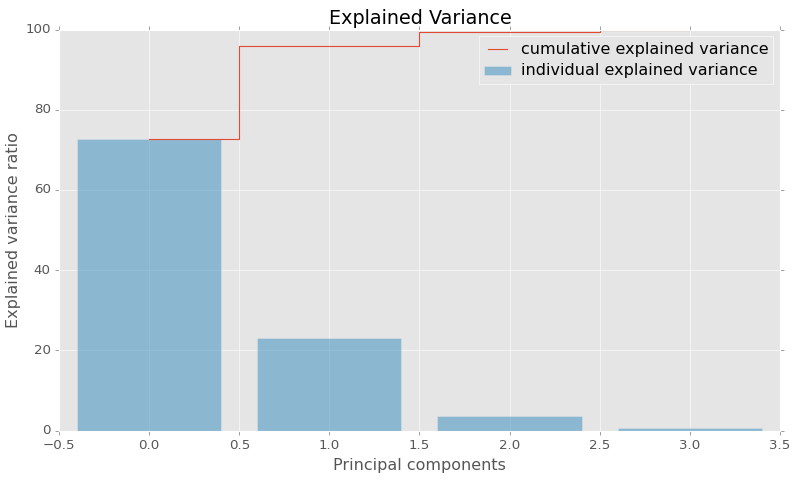

In [4]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
num_eigs = len(eig_pairs)
with plt.style.context(plt_style):
    plt.figure(figsize=(10, 6))

    plt.bar(range(num_eigs), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(num_eigs), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.title('Explained Variance')
    plt.tight_layout()

## PCA (2D)
We make a scatter plot of the first (most important) two components.

<IPython.core.display.Javascript object>


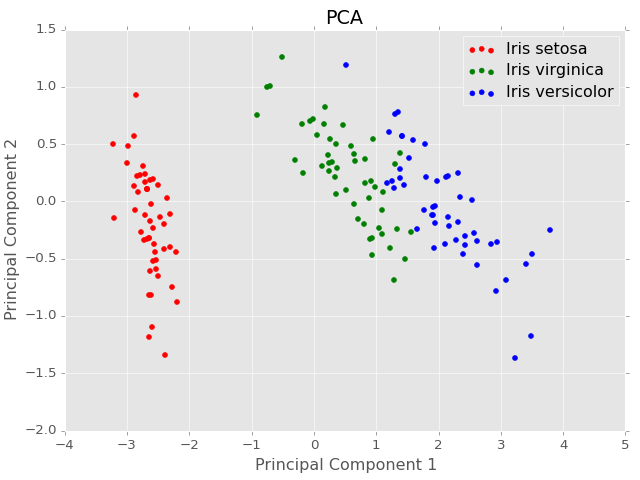

In [5]:
X_pca = PCA(n_components=2).fit_transform(X)

with plt.style.context(plt_style):
    plt.figure(figsize=(8, 6))
    for lab, col in zip(np.unique(y), ['red', 'green', 'blue']):
        plt.scatter(X_pca[y==lab, 0],
                    X_pca[y==lab, 1],
                    label=y_labels[lab],
                    color = col,
                   )
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.title('PCA')
    plt.tight_layout()
    plt.show()

## KPCA
A more sophisticated version of PCA uses a kernel to attempt to bring linearity to a nonlinear separation. Just for fun, we tried a few different kernels. Only a polynomial kernel of degree 4 was even a little bit interesting.

<IPython.core.display.Javascript object>


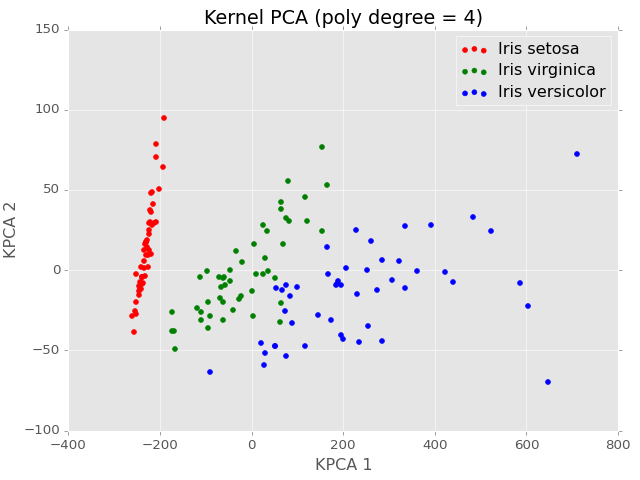

In [6]:
X_kpca = KernelPCA(n_components=2, kernel='poly', degree=4).fit_transform(X)

with plt.style.context(plt_style):
    plt.figure(figsize=(8, 6))
    for lab, col in zip(np.unique(y), ['red', 'green', 'blue']):
        plt.scatter(X_kpca[y==lab, 0],
                    X_kpca[y==lab, 1],
                    label=y_labels[lab],
                    color = col,
                   )
    plt.xlabel('KPCA 1')
    plt.ylabel('KPCA 2')
    plt.legend(loc='best')
    plt.title('Kernel PCA (poly degree = 4)')
    plt.tight_layout()
    plt.show()

## PCA (3D)

<IPython.core.display.Javascript object>


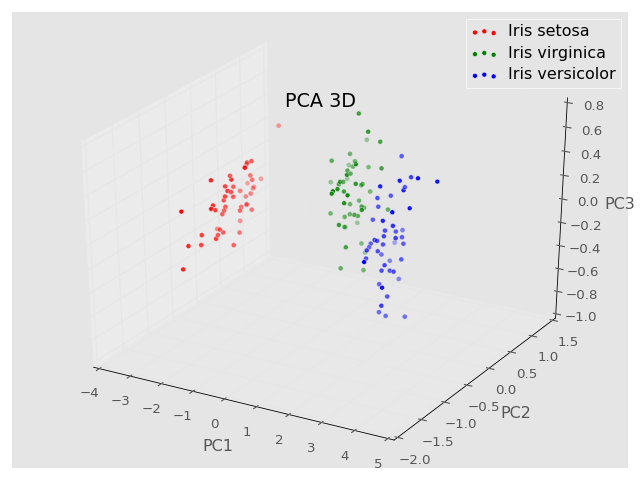

In [7]:
X_pca3 = PCA(n_components=3).fit_transform(X)

with plt.style.context(plt_style):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for lab, col in zip(np.unique(y), ['red', 'green', 'blue']):
        xs = X_pca3[y==lab, 0]
        ys = X_pca3[y==lab, 1]
        zs = X_pca3[y==lab, 2]
        ax.scatter(xs, ys, zs, c=col, label=y_labels[lab])

        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')

        plt.legend(loc='best')
        plt.title('PCA 3D')
        plt.tight_layout()
        plt.show()

## t-SNE (2D)

<IPython.core.display.Javascript object>


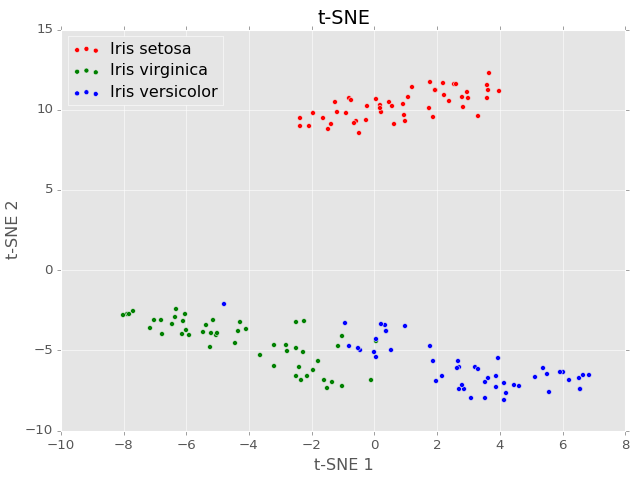

In [8]:
X_tsne = TSNE(learning_rate=100, random_state=0).fit_transform(X)
with plt.style.context(plt_style):
    plt.figure(figsize=(8, 6))
    for lab, col in zip([0,1,2], ['red', 'green', 'blue']):
        plt.scatter(X_tsne[y==lab, 0],
                    X_tsne[y==lab, 1],
                    label=y_labels[lab],
                    c=col)
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.legend(loc='upper left')
    plt.title('t-SNE')
    plt.tight_layout()
    plt.show()

## t-SNE (3D)

<IPython.core.display.Javascript object>


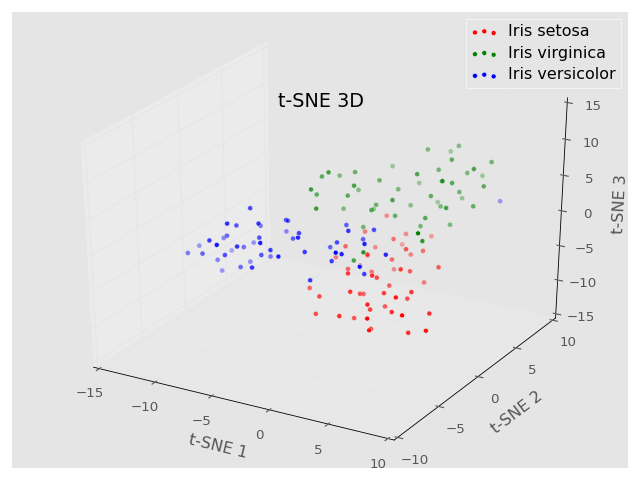

In [9]:
X_tsne3 = TSNE(n_components=3, learning_rate=100, random_state=0).fit_transform(X)

with plt.style.context(plt_style):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for lab, col in zip([0,1,2], ['red', 'green', 'blue']):
        xs = X_tsne3[y==lab, 0]
        ys = X_tsne3[y==lab, 1]
        zs = X_tsne3[y==lab, 2]
        ax.scatter(xs, ys, zs, c=col, label=y_labels[lab])

        ax.set_xlabel('t-SNE 1')
        ax.set_ylabel('t-SNE 2')
        ax.set_zlabel('t-SNE 3')

        plt.legend(loc='best')
        plt.title('t-SNE 3D')
        plt.tight_layout()
        plt.show()